## Formulating Linear Regression Problem 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from numpy.linalg import inv,pinv
from numpy import dot,power
from utils import *

#### Load Data 

Text(0,0.5,'y')

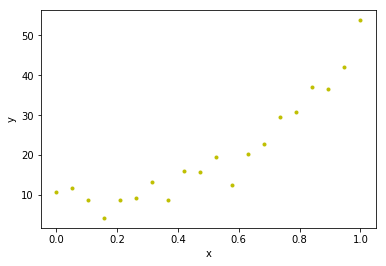

In [123]:
filename = '../python_data/func_example.npy'
data = np.load(open(filename,'rb'))
x = data[:,0]
y = data[:,1]
plt.plot(x,y,'.y')
plt.xlabel('x')
plt.ylabel('y')

##### In the following questions, we will assume $y = f(x)$ where $f(x)$ is a function parametrized by several constants, and we want to find the constants by formulating the problem as linear regression problem

### Question 1

Assume that $f(x) = Ae^{Bx}$, where A and B are unknown constants. Find A and B!

### Question 2

Assume that $f(x) = A + Bx + Cx^2 + Dx^3$, where A,B,C and D are unknown constants. Find A,B,C and D!

### Question 3

Assume that $f(x) = A + Bx + Cx^2 + Dx^3 + Ex^4 + Fx^5 + Gx^6 + Hx^7$, where $A-H$ are unknown constants. Find $A-H$!
Note that with high polynomial degrees, the noise is also fit by the regression. Use Ridge Regression to smoothen the function $f(x)$! (try different value of the regularization coefficient and see its effect on the resulting function). 

#### Solutions

#### Question 1 

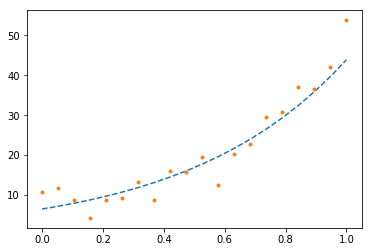

In [124]:
Y = np.log(y)
X = np.vstack([np.ones(len(x)), x]).T
C = dot(pinv(X),Y)
A = np.exp(C[0])
B = C[1]
Y_pred = A*np.exp(B*x)
plt.plot(x,Y_pred,'--')
plt.plot(x,y,'.')

#### Question 2 

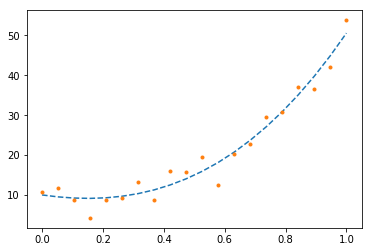

In [125]:
from sklearn.preprocessing import PolynomialFeatures
poly_fit = PolynomialFeatures(degree=3)
X = poly_fit.fit_transform(x[:,None])
Y = y[:,None]
C = dot(pinv(X),Y)
Y_pred = dot(X,C)
plt.plot(x,Y_pred,'--')
plt.plot(x,y,'.')

#### Question 3 

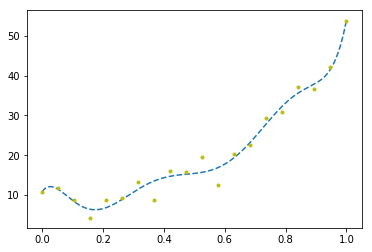

In [126]:
from sklearn.preprocessing import PolynomialFeatures
poly_fit = PolynomialFeatures(degree=7)
X = poly_fit.fit_transform(x[:,None])
Y = y[:,None]
C = dot(pinv(X,rcond=1e-7),Y)

x_test = np.linspace(0,1,1000)
X_test = poly_fit.fit_transform(x_test[:,None])
Y_pred = dot(X_test,C)
plt.plot(x_test,Y_pred,'--')
plt.plot(x,y,'.y')